# Binary Classification
- Algorithms & Methods
- Class Imbalances
- Model Selection

In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from Preprocessing import IncomePreprocess


In [12]:
train_data = pd.read_csv('../data/census_income_learn.csv', header=None)
test_data = pd.read_csv('../data/census_income_test.csv', header=None)

In [13]:
# Preprocessing step
ip  = IncomePreprocess()
# df, df_test = ip.label_features(train_data, test_data)
X_train, X_test = ip.preprocess(train_data, test_data)

In [14]:
# Splitting the features from the response

Y_train = X_train.pop('y')
Y_test = X_test.pop('y')

In [15]:
# Counts of the classes, imabalanced dataset!
# Have to consider how we can deal with this imbalance

(unique, counts) = np.unique(Y_train, return_counts=True)
print(f"Classes of response: {unique}, Count per class: {counts}")

Classes of response: [0 1], Count per class: [183912  12382]


In [16]:
# Initializing models
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
lgm = LogisticRegression(solver="liblinear")
svc = SVC(kernel='rbf',class_weight='balanced', probability=True)

In [17]:
# Reporting function

def classification_report_csv(model_name, report):
    report.update({"accuracy": {"precision": None, "recall": None, "f1-score": report["accuracy"], "support": report['macro avg']['support']}})
    dataframe = pd.DataFrame(report).transpose()
    dataframe.to_csv(f'../reports/{model_name}_report.csv', index = False)

## Model Training 

Logistic Regression Results
---------------------------
Confusion matrix 
 [[91677  1016]
 [ 4142  2044]]
Classifcation report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     92693
           1       0.67      0.33      0.44      6186

    accuracy                           0.95     98879
   macro avg       0.81      0.66      0.71     98879
weighted avg       0.94      0.95      0.94     98879

Accuracy 0.9478352329614984
ROC AUC: 0.9343133495174594


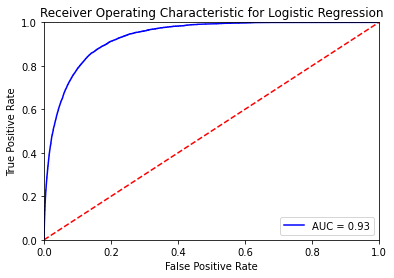

In [18]:
# Logistic Classifier
model_name = 'LogisticRegressionClassification'
lgm.fit(X_train, Y_train)

y_pred = lgm.predict(X_test)

# Evaluation
print('Logistic Regression Results')
print('---------------------------')
print('Confusion matrix \n', confusion_matrix(Y_test,y_pred))
print('Classifcation report \n', classification_report(Y_test,y_pred))
print('Accuracy', accuracy_score(Y_test, y_pred))
# Sending the report to csv
report = classification_report(Y_test, y_pred, output_dict=True)
classification_report_csv(model_name, report)

probabilities = lgm.predict_proba(X_test)
probs = [p[1] for p in probabilities]
preds = probabilities[:,1]
print('ROC AUC:', roc_auc_score(Y_test, preds))

fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Random Forests Classifier Results
---------------------------
Confusion matrix 
 [[91567  1126]
 [ 3863  2323]]
Classifcation report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     92693
           1       0.67      0.38      0.48      6186

    accuracy                           0.95     98879
   macro avg       0.82      0.68      0.73     98879
weighted avg       0.94      0.95      0.94     98879

Accuracy 0.9495443926415114
ROC AUC: 0.9270478760145786


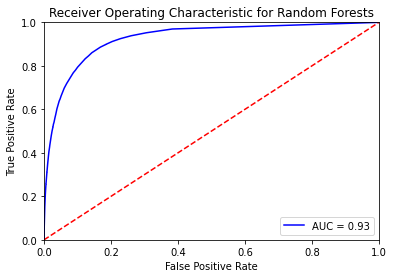

In [19]:
# Fitting a random forests classifier
model_name = 'RandomForestClassifier'
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
print('Random Forests Classifier Results')
print('---------------------------')
print('Confusion matrix \n', confusion_matrix(Y_test,y_pred))
print('Classifcation report \n', classification_report(Y_test,y_pred))
print('Accuracy', accuracy_score(Y_test, y_pred))
# Sending the report to csv
report = classification_report(Y_test, y_pred, output_dict=True)
classification_report_csv(model_name, report)

probabilities = rf.predict_proba(X_test)
probs = [p[1] for p in probabilities]
preds = probabilities[:,1]
print('ROC AUC:', roc_auc_score(Y_test, preds))

fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# Support Vector Machine
# model_name = 'Penalized_SVM'
# svc.fit(X_train, Y_train)

# y_pred = svc.predict(X_test)
# print('SVC Results')
# print('---------------------------')
# print('Confusion matrix \n', confusion_matrix(Y_test,y_pred))
# print('Classifcation report \n', classification_report(Y_test,y_pred))
# print('Accuracy', accuracy_score(Y_test, y_pred))
# # Sending the report to csv
# report = classification_report(Y_test, y_pred, output_dict=True)
# classification_report_csv(model_name, report)

# probabilities = svc.predict_proba(X_test)
# probs = [p[1] for p in probabilities]
# preds = probabilities[:,1]
# print('ROC AUC:', roc_auc_score(Y_test, preds))

# fpr, tpr, threshold = roc_curve(Y_test, preds)
# roc_auc = auc(fpr, tpr)


# plt.title('Receiver Operating Characteristic for SVC')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

## Feature selection methoods

In [21]:
# Running feature selection analyis to improve performance of models
# Using the important features derived from the random forests model

print('Number of features before feature selection: ', X_train.shape[1])  

model = SelectFromModel(rf, prefit=True)
X_new = model.transform(X_train)
X_new_test = model.transform(X_test)
print('Number of features after feature selection: ', X_new.shape[1])       

importances = rf.feature_importances_
print('Feature Importances from fitted Random Forests Model \n', importances)  


Number of features before feature selection:  41


C:\Users\johne\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\johne\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features after feature selection:  12
Feature Importances from fitted Random Forests Model 
 [0.13979299 0.02710358 0.06542556 0.09341678 0.11450461 0.01340757
 0.0005681  0.01868699 0.0455516  0.0336504  0.01181738 0.00890517
 0.03210875 0.01733095 0.00281949 0.01355976 0.01741909 0.00393482
 0.00573843 0.01984961 0.01605692 0.00673385 0.00715933 0.00696733
 0.00638326 0.00662633 0.05209775 0.00060852 0.01758975 0.01626053
 0.00847486 0.00608945 0.01820241 0.00249855 0.0027516  0.04641634
 0.0044789  0.02739315 0.01288173 0.04557186 0.00316592]


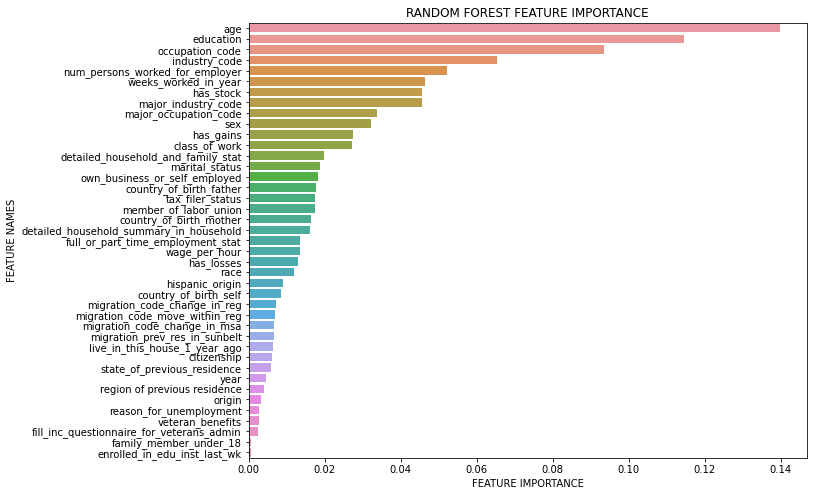

In [23]:
# Plotting the imprortant features

def plot_feature_importance(importance , names, model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(importances , X_train.columns,'RANDOM FOREST')


## Model Training again with the subset of the data (selected features)

Random Forests Classifier post Feature Selcetion Results
---------------------------
Confusion matrix 
 [[91066  1627]
 [ 3719  2467]]
Classifcation report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     92693
           1       0.60      0.40      0.48      6186

    accuracy                           0.95     98879
   macro avg       0.78      0.69      0.73     98879
weighted avg       0.94      0.95      0.94     98879

Accuracy 0.9459339192346201
Important Features Random Forests Classifier Results
---------------------------
Confusion matrix 
 [[91066  1627]
 [ 3719  2467]]
Classifcation report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     92693
           1       0.60      0.40      0.48      6186

    accuracy                           0.95     98879
   macro avg       0.78      0.69      0.73     98879
weighted avg       0.94      0.95      0.94     98879

Accura

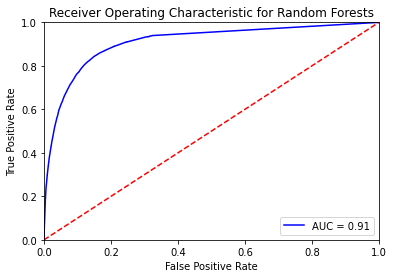

In [25]:
model_name = 'RandomForestClassifier_Feature_Engineered'
rf.fit(X_new, Y_train)

y_pred = rf.predict(X_new_test)
print('Random Forests Classifier post Feature Selcetion Results')
print('---------------------------')
print('Confusion matrix \n', confusion_matrix(Y_test,y_pred))
print('Classifcation report \n', classification_report(Y_test,y_pred))
print('Accuracy', accuracy_score(Y_test, y_pred))

print('Important Features Random Forests Classifier Results')
print('---------------------------')
print('Confusion matrix \n', confusion_matrix(Y_test,y_pred))
print('Classifcation report \n', classification_report(Y_test,y_pred))
print('Accuracy', accuracy_score(Y_test, y_pred))
# Sending the report to csv
report = classification_report(Y_test, y_pred, output_dict=True)
classification_report_csv(model_name, report)

probabilities = rf.predict_proba(X_new_test)
probs = [p[1] for p in probabilities]
preds = probabilities[:,1]
print('ROC AUC:', roc_auc_score(Y_test, preds))

fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Important Features Logistic Regression Classifier Results
---------------------------
Confusion matrix 
 [[91684  1009]
 [ 4243  1943]]
Classifcation report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     92693
           1       0.66      0.31      0.43      6186

    accuracy                           0.95     98879
   macro avg       0.81      0.65      0.70     98879
weighted avg       0.94      0.95      0.94     98879

Accuracy 0.9468845760980592
ROC AUC: 0.9093543697393015


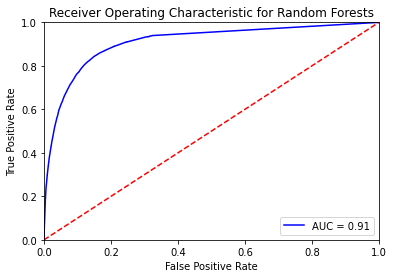

In [26]:
model_name = 'LogisiticRegression_Feature_Engineered'

lgm.fit(X_new, Y_train)

y_pred = lgm.predict(X_new_test)

print('Important Features Logistic Regression Classifier Results')
print('---------------------------')
print('Confusion matrix \n', confusion_matrix(Y_test,y_pred))
print('Classifcation report \n', classification_report(Y_test,y_pred))
print('Accuracy', accuracy_score(Y_test, y_pred))
# Sending the report to csv
report = classification_report(Y_test, y_pred, output_dict=True)
classification_report_csv(model_name, report)

probabilities = rf.predict_proba(X_new_test)
probs = [p[1] for p in probabilities]
preds = probabilities[:,1]
print('ROC AUC:', roc_auc_score(Y_test, preds))

fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature engineering reduces the dataset, but actually reduces the performance of the models!

## Model Selection and Hyperparameter Tuning
- The Random Forests and Logistic Regression perform similar
- Perform random grid search on hyperparameters for each model
- Evaluate how it affects performance

In [ ]:

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

# summarize results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))